# Prediction of H1N1 and Seasonal Flu Vaccinations
## 1. Introduction


### 1.1 Problem Statement
### 1.2 Main Objective
The goal of this project is to create a model that can predict vaccine uptake based on a person's background and behavioral patterns.
## 1.3 Metric for Success
## 1.4 Experimental Design

## 1.5 Data Description
The datasets used for this project were downloaded from [Driven Data]("https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/). The original data source is the [National 2009 H1N1 Flu Survey (NHFS)](https://webarchive.loc.gov/all/20140511165905/http://www.cdc.gov/nchs/nis/data_files_h1n1.htm) and it contains information on the social,economic and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The datasets have been divided into the training set features, the training set labels and the test set features. The training data has 26707 rows and 36 columns. The information contained with the columns is as follows as described by the data [dictionary](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/):

|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getting sick with seasonal flu without vaccine with 1 being very low and 5 being very high|
|22|`opinion_seas_sick_from_vacc`| Respondent's worry of getting sick from taking seasonal flu vaccine with 1 being not worried at all and 5 being very worried|
|23|`age_group`| Age group of respondents|
|24|`education`| Self-reported educational level|
|25|`race`| Race of respondent|
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 

## 2. Reading the Data

In [255]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier

In [2]:
# setting maximum number of columns to be displayed
pd.set_option('display.max_columns',300)

# setting a standard font size for plots
plt.rcParams['font.size'] = 16

In [3]:
# loading training features into a dataframe and previewing first five rows
train_features_df = pd.read_csv("Dataset/training_set_features.csv",index_col = "respondent_id")
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# loading training labels into a dataframe and previewing first five rows
train_label_df = pd.read_csv("Dataset/training_set_labels.csv",index_col = "respondent_id")
train_label_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
# assert that the respondent_id in features and labels column are the same in order to merge
assert train_features_df.index.equals(train_label_df.index)

In [6]:
# joining the two dataframes
data = train_features_df.join(train_label_df)
data.shape

(26707, 37)

## 3. Assessing the Data

In [7]:
# previewing the last five rows
data.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


In [8]:
# previewing number of rows and columns
data.shape

(26707, 37)

In [9]:
# previewing the datatypes
data.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [10]:
# previewing summary statistics of columns
data.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [11]:
# checking for duplicates
data.duplicated().sum()

0

In [12]:
# checking for missing values
missing = data.isna().sum().to_frame().sort_values(0,ascending = False)
missing

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


In [13]:
# checking for distribution of target ie h1n1_vaccine and seasonal vaccine
print(f"Count of people vaccinated against H1N1: \n{data.h1n1_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against H1N1: \n{data.h1n1_vaccine.value_counts(normalize = True)}\n")
print(f"Count of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts()}\n")
print(f"Percentage of people vaccinated against seasonal flu: \n{data.seasonal_vaccine.value_counts(normalize = True)}\n")

Count of people vaccinated against H1N1: 
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Percentage of people vaccinated against H1N1: 
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

Count of people vaccinated against seasonal flu: 
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Percentage of people vaccinated against seasonal flu: 
0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64



### Key Observations
* Most columns with float datatype are categorical in nature with values ranging from 0-5.
* There are no duplicate rows
* Almost all columns have missing values
* The columns, hhs_geo_region, employment_industry and employment_occupation are encoded with random strings, possibly to anonymise the data, they will need to be replaced with numbers for readability
* There is a class imbalance issue in the h1n1_vaccine column, a model predicting only 0s (person is not vaccinated) would be correct 78% of the time

## 4. Exploratory Data Analysis
### 4.1 Univariate 
This section mainly explores the distribution of some features

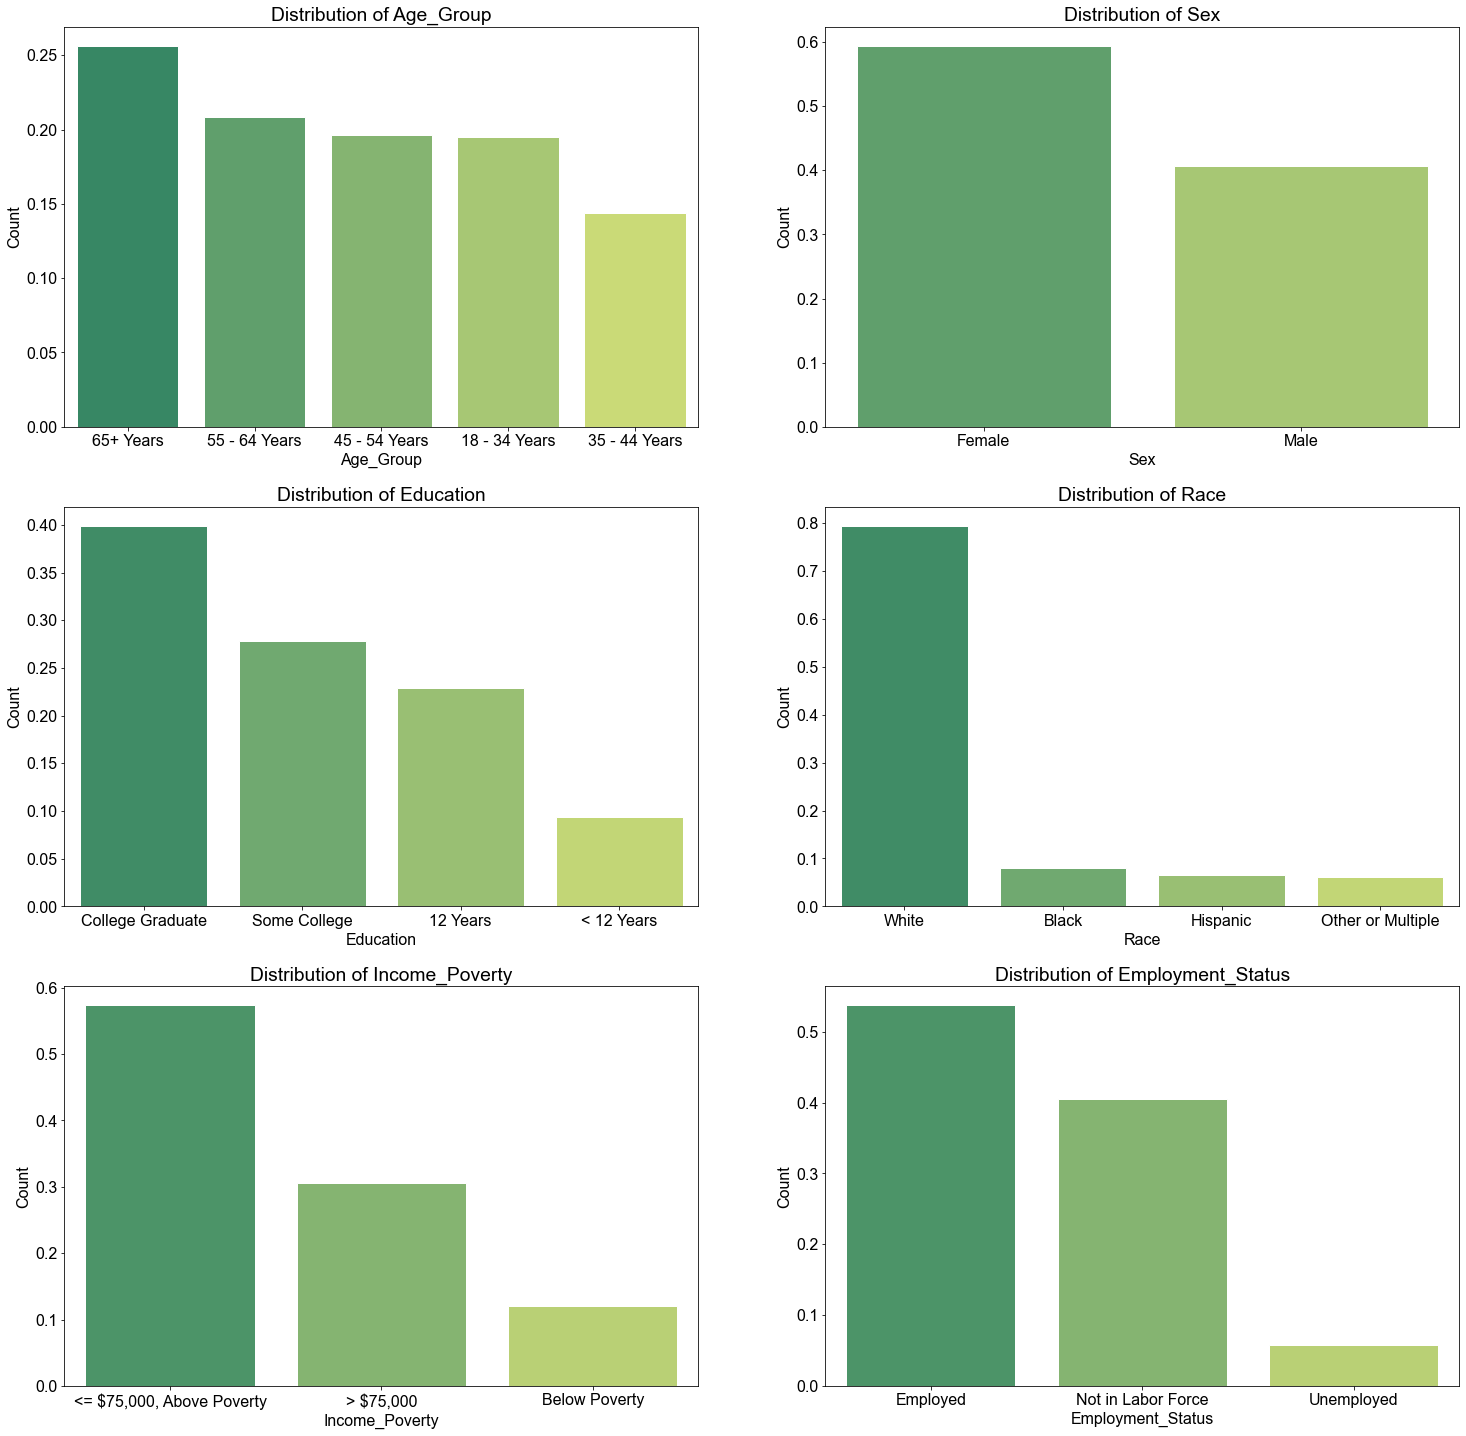

In [14]:
# adding columns to plot to a list
columns = ["age_group","sex","education","race","income_poverty","employment_status"]

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (25,25),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart

    ax.set_xlabel(f"{col.title()}") # setting the respective labels
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}");

#### Key Observations
* Majority of the respondents are above 65 years of age though variance between the groups is quite low.
* Almost 60% of the respondents are female.
* Most of the respondents are college graduates
* People identifying as white dominate the dataset at around 80%.
* Close to 60% of the respondents earn between the poverty line and around $75,000 annually.
* Most of the respondents are employed

### 4.2 Multivariate 
#### 4.2.1 What is the relationship between concern about H1N1 and vaccine uptake?
It can be expected that the more the concern about catching H1N1, the more the respondents are likely to take either the seasonal flu vaccine or the H1N1 vaccine. Plotting this in a bar graph:

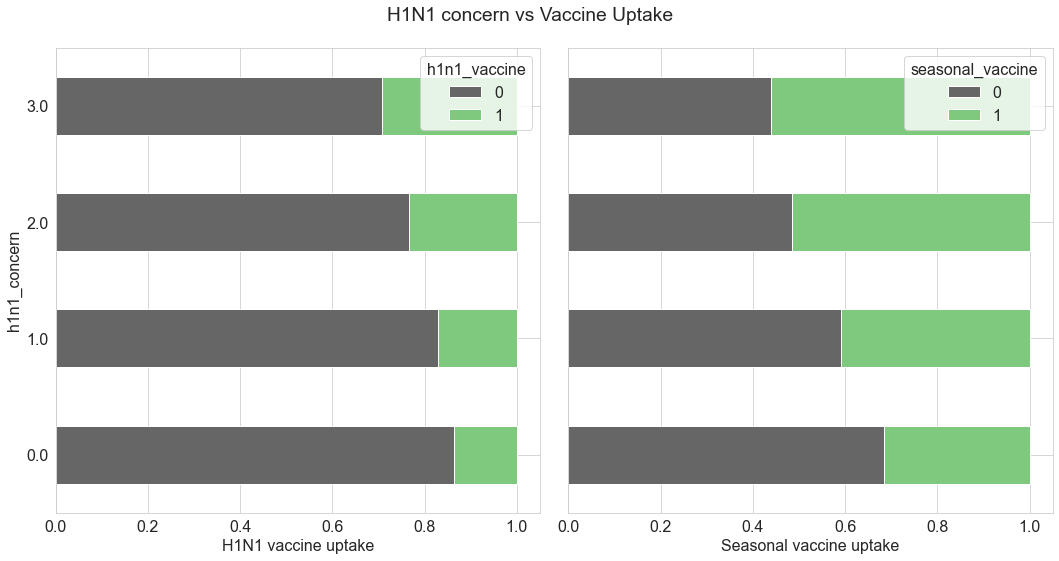

In [15]:
my_cmap = sns.color_palette("Accent_r",as_cmap=True)
fig,(ax_1,ax_2) = plt.subplots(figsize = (15,8),ncols = 2,sharey = True)

crosstab_concern1 = pd.crosstab(data["h1n1_concern"],data['h1n1_vaccine'],normalize="index")
crosstab_concern1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_concern2 = pd.crosstab(data["h1n1_concern"],data['seasonal_vaccine'],normalize="index")
crosstab_concern2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine uptake")
ax_2.set_xlabel("Seasonal vaccine uptake")

fig.suptitle("H1N1 concern vs Vaccine Uptake")
fig.tight_layout()

From this graph, the higher the concern about being sick, the higher the likelihood of taking the vaccine. Uptake of seasonal flu vaccine is noticeably higher in all categories. There could be some hesitance in taking the H1N1 vaccine.

#### 4.2.2 What is the relationship between knowledge about H1N1 and vaccine uptake?
It can also be expected that the more a person knows about the cause, effect and prevention of H1N1, the more likely they are to procure vaccinations. Plotting this:

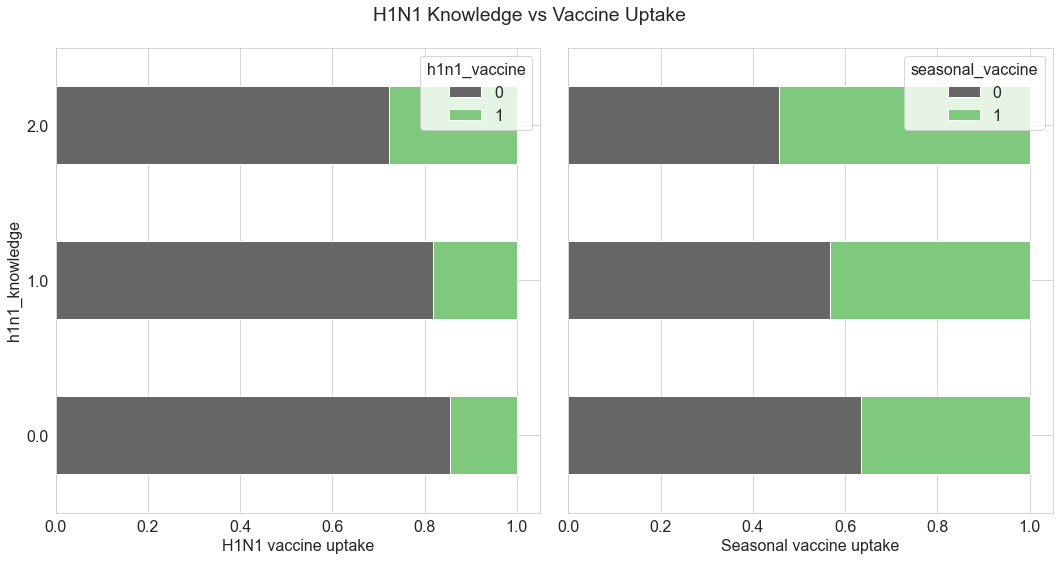

In [16]:
fig,(ax_1,ax_2) = plt.subplots(figsize = (15,8),ncols = 2,sharey = True)

crosstab_know1 = pd.crosstab(data["h1n1_knowledge"],data['h1n1_vaccine'],normalize="index")
crosstab_know1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_know2 = pd.crosstab(data["h1n1_knowledge"],data['seasonal_vaccine'],normalize="index")
crosstab_know2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine uptake")
ax_2.set_xlabel("Seasonal vaccine uptake")

fig.suptitle("H1N1 Knowledge vs Vaccine Uptake")
fig.tight_layout()

Once again, there is a noticeable increase in vaccine uptake with increase in H1N1 knowledge. People are once again more likely to take seasonal flu vaccinations.

#### 4.2.3 What is the relationship between gender, race, age group and vaccine uptake?

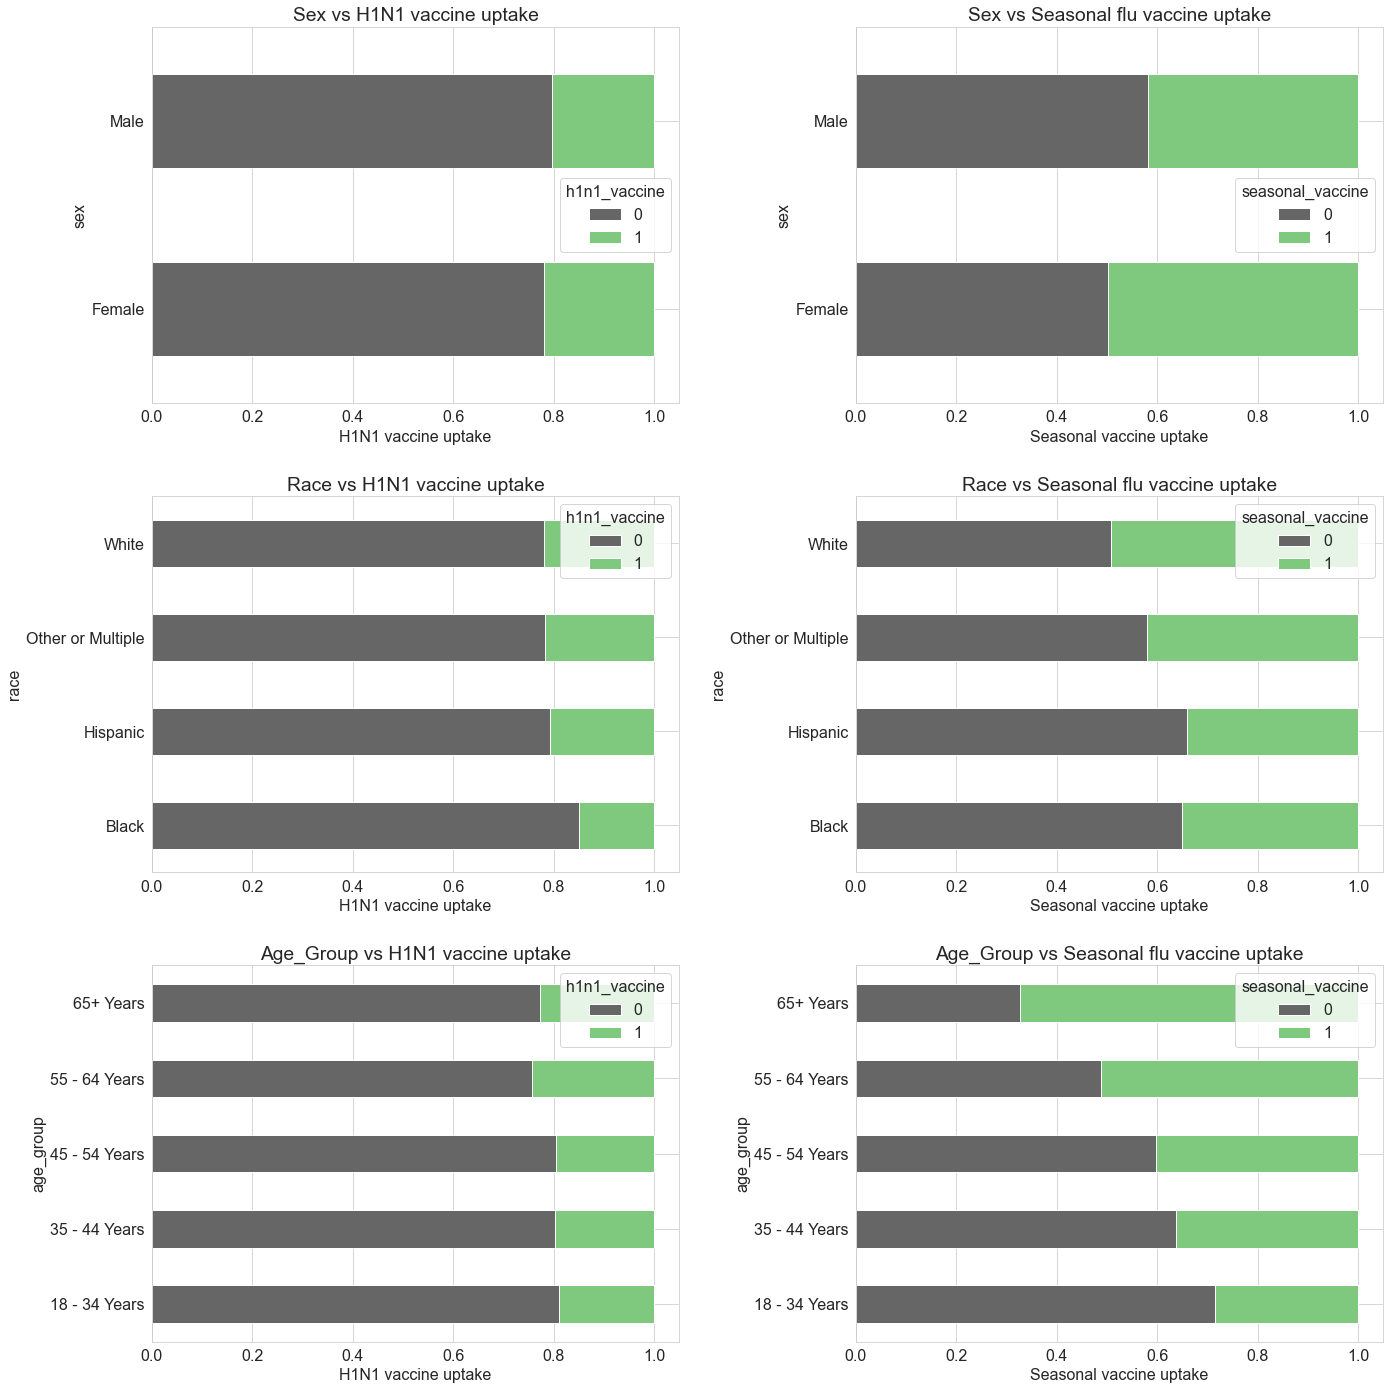

In [17]:
fig,axes = plt.subplots(figsize = (20,20),ncols = 2,nrows = 3)
to_plot = ["sex","race","age_group"]

for idx,col in enumerate(to_plot):
    left_ax = axes[idx,0]
    right_ax = axes[idx,1]

    crosstab1 = pd.crosstab(data[col],data['h1n1_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = left_ax)
    crosstab2 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = right_ax)
    left_ax.set_xlabel("H1N1 vaccine uptake")
    right_ax.set_xlabel("Seasonal vaccine uptake")
    left_ax.set_title(f"{col.title()} vs H1N1 vaccine uptake")
    right_ax.set_title(f"{col.title()} vs Seasonal flu vaccine uptake")

fig.tight_layout(pad=2);

From the graphs, the following can be noted:
* Vaccine uptake between the genders is almost equal, though there are more women taking the seasonal flu vaccine
* Among the race H1N1 vaccine uptake is also almost equal, it is quite low however and people identifying as black are the minority. Seasonal flu vaccine uptake is much higher.
* In the various age groups, younger respondents are less likely to take vaccines in both cases. The correlation between the two variables actually appears to be linear. It checks out, however, as  older people are [more likely to suffer from complications resulting from seasonal flu.](https://www.cdc.gov/flu/highrisk/index.htm)

#### 4.2.3 Do people's opinions influence H1N1 vaccine uptake?

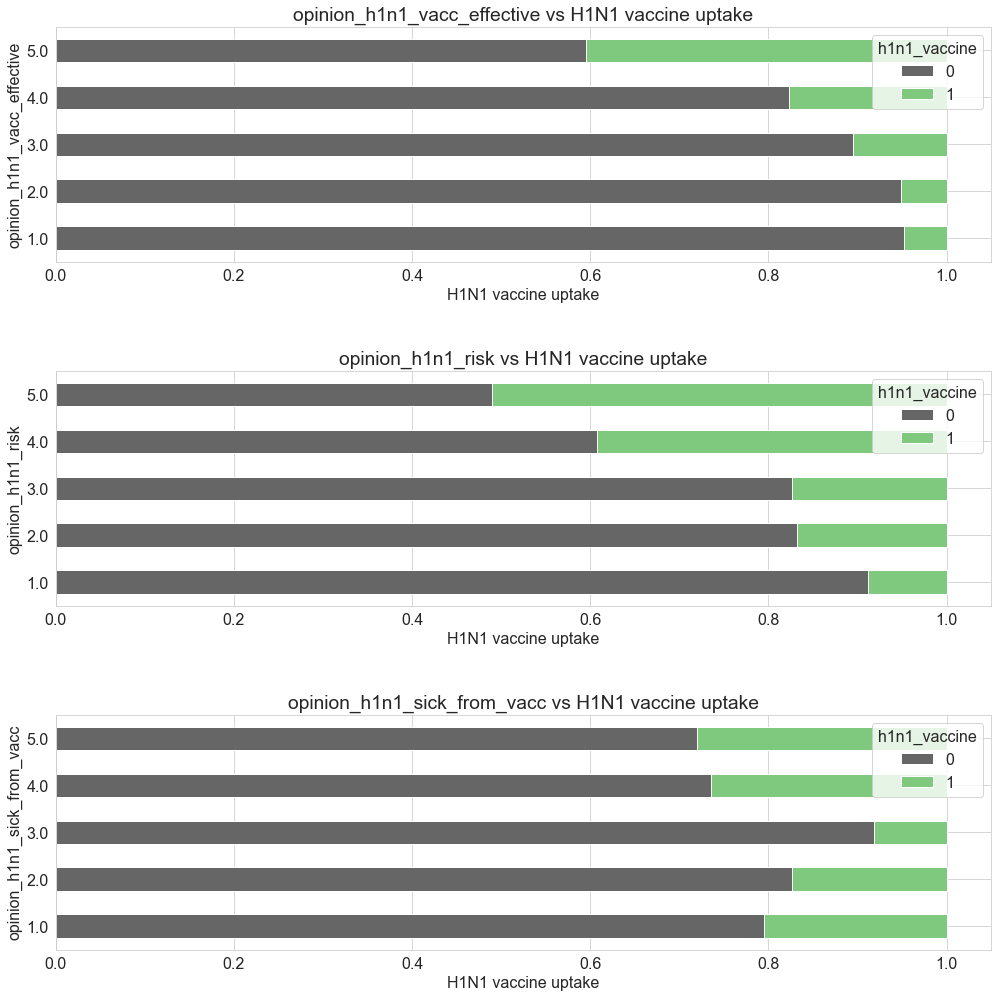

In [18]:
fig,axes = plt.subplots(figsize = (15,15),nrows = 3)
cols_to_plot = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc']

for idx,col in enumerate(cols_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(data[col],data['h1n1_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax)
    ax.set_xlabel("H1N1 vaccine uptake")
    ax.set_title(f"{col} vs H1N1 vaccine uptake")

fig.tight_layout(pad=3);

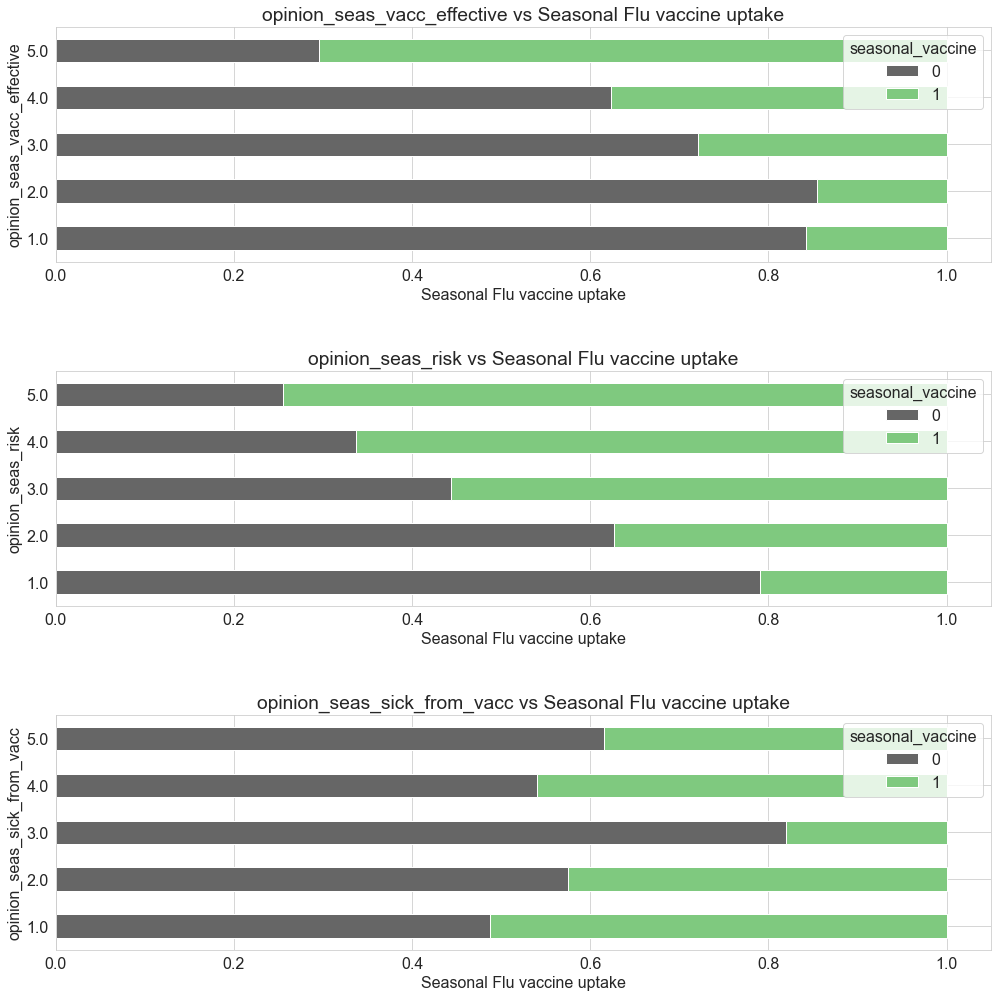

In [19]:
fig,axes = plt.subplots(figsize = (15,15),nrows = 3)
features_to_plot = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',]

for idx,col in enumerate(features_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax)
    ax.set_xlabel("Seasonal Flu vaccine uptake")
    ax.set_title(f"{col} vs Seasonal Flu vaccine uptake")

fig.tight_layout(pad=3);

## 4. Data Preprocessing
This section aims to prepare the data for modelling. It addresses missing data, wrong data types, invalid datatypes, scaling, encoding any categorical variables,dropping highly correlated columns and any feature engineering needed. The data is first split into training and test data to prevent data leakage. The target variables are meant to be `h1n1_vaccine` and `seasonal_vaccine`. The two columns are both droped from X. This section first focuses on `seasonal_vaccine` as the target variable. 

In [20]:
# separating target variables from the features
X = data.drop(["seasonal_vaccine","h1n1_vaccine"],axis=1)
y = data.seasonal_vaccine

In [21]:
# splitting data into test and train and setting a random seed for reproducibility
random_seed = 1234

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_seed,stratify=y)

#### 4.1. Checking for Multicollinearity
Columns that are highly correlated will lead to multicollinearity issues which can affect model performance as there are two columns providing similar information. One of the columns would need to be dropped. A dataframe is created with correlated pairs and their correlation coefficent. Anything above 80% should be have one column dropped

In [22]:
# creating dataframe of correlated pairs and sorting in descending order
df_corr = X_train.corr().abs().stack().reset_index().sort_values(0,ascending = False)
df_corr["pairs"] = list(zip(df_corr.level_0,df_corr.level_1))
df_corr.set_index(["pairs"],inplace = True)
df_corr.drop(columns = ["level_1","level_0"],inplace=True)
df_corr.columns = ["cc"]
df_corr.drop_duplicates(inplace = True) 

In [23]:
# previewing top ten correlated pairs
df_corr[:10]

,cc
pairs,
"(h1n1_concern, h1n1_concern)",1.000000
"(doctor_recc_h1n1, doctor_recc_seasonal)",0.589431
"(behavioral_outside_home, behavioral_large_gatherings)",0.576326
"(opinion_seas_risk, opinion_h1n1_risk)",0.565173
"(opinion_seas_sick_from_vacc, opinion_h1n1_sick_from_vacc)",0.491145
"(opinion_h1n1_vacc_effective, opinion_seas_vacc_effective)",0.476179
"(h1n1_concern, opinion_h1n1_risk)",0.377533
"(h1n1_concern, opinion_h1n1_sick_from_vacc)",0.362664
"(behavioral_wash_hands, behavioral_touch_face)",0.360558


The highest correlation is 59%. As a result, no columns will be dropped.

### 4.2. Missing values
Missing values are to be dealt with in a number of ways:
* replacing with mode or the string 'missing'
* dropping rows

#### 4.2.1 Replacing
The SimpleImputer class is used to impute columns with missing values with their modes and with string "missing".

In [24]:
# previewing columns with missing data
missing_train = X_train.isna().sum().to_frame().sort_values(0,ascending = False)
missing_train

,0
employment_occupation,10158
employment_industry,10052
health_insurance,9199
income_poverty,3294
doctor_recc_h1n1,1591
doctor_recc_seasonal,1591
rent_or_own,1531
employment_status,1093
marital_status,1051
education,1049


In [25]:
# instantiating a SimpleImputer to fill missing data with their modes
imputer_fill = SimpleImputer(strategy = "most_frequent",missing_values = np.nan)
cols_to_fill = ["income_poverty","doctor_recc_h1n1","doctor_recc_seasonal","education","health_insurance","health_worker"]

# fitting and transforming on the train data then reassigning 
X_train[cols_to_fill] = imputer_fill.fit_transform(X_train[cols_to_fill])

# transforming test data
X_test[cols_to_fill] = imputer_fill.transform(X_test[cols_to_fill])



In [26]:
# instantiating a SimpleImputer to fill missing data with the string "missing"
imputer_miss = SimpleImputer(strategy="constant",missing_values=np.nan,fill_value="missing")
cols_miss = ["employment_status","employment_occupation","employment_industry"]

# fitting and transforming on the train data then reassigning
X_train[cols_miss] = imputer_miss.fit_transform(X_train[cols_miss])

# transforming test data
X_test[cols_miss] = imputer_miss.transform(X_test[cols_miss])
   

##### 4.2.2. Dropping rows

At this point rows can be dropped because the amount of data that will be lost is very small

In [27]:
# dropping rows with null values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [28]:
# checking for any null values in the train and test set
print("Number of null values in train data:",X_train.isnull().sum().sum(),"\n")
print("Number of null values in test data:",X_test.isnull().sum().sum())

Number of null values in train data: 0 

Number of null values in test data: 0


It also makes sense to remove the dropped rows from y_test and y_train for the models to work.

In [29]:
# identifying indices to drop
set1 = set(y_test.index) 
set2 = set(X_test.index)
set3 = set(y_train.index)
set4 = set(X_train.index)

index_to_drop_test = list(set1 - set2)
index_to_drop_train = list(set3-set4)

In [30]:
#dropping those rows
y_test = y_test.drop(index_to_drop_test)
y_train = y_train.drop(index_to_drop_train)

In [31]:
# asserting the change
assert len(y_test) == len(X_test)
assert len(y_train) == len(X_train)


### 4.3. Encoding Categorical Values
Since most machine learning models are unable to work with categorical values, there is need to represent these values in numerical format. This section addresses this using the pandas `get_dummies` method. There are also three columns that have been encoded with random strings. They are to be replaced with numbers for readability then one hot encoded.

#### 4.3.1. Replacing column values
This can be achieved with the OrdinalEncorder class which will result in a column of integers from 0 to n-1 categories.

In [32]:
# assessing one of the columns with anonymised data
X_train.employment_industry.value_counts()

missing     8268
fcxhlnwr    1732
wxleyezf    1296
ldnlellj     858
pxcmvdjn     747
atmlpfrs     643
arjwrbjb     617
xicduogh     568
mfikgejo     455
rucpziij     378
xqicxuve     366
vjjrobsf     363
saaquncn     243
cfqqtusy     229
nduyfdeo     194
mcubkhph     191
wlfvacwt     144
dotnnunm     143
haxffmxo     107
msuufmds      89
phxvnwax      55
qnlwzans      12
Name: employment_industry, dtype: int64

In [33]:
# columns to replace
to_replace = ['employment_industry','employment_occupation','hhs_geo_region']

# instantiating the class
ord_en = OrdinalEncoder()

# fitting and transforming on training data and transforming on test data
X_train[to_replace] = ord_en.fit_transform(X_train[to_replace])
X_test[to_replace] = ord_en.transform(X_test[to_replace])


In [34]:
# confirming the change
X_train.employment_industry.value_counts()

9.0     8268
4.0     1732
19.0    1296
6.0      858
13.0     747
1.0      643
0.0      617
20.0     568
8.0      455
15.0     378
21.0     366
17.0     363
16.0     243
2.0      229
11.0     194
7.0      191
18.0     144
3.0      143
5.0      107
10.0      89
12.0      55
14.0      12
Name: employment_industry, dtype: int64

##### 4.3.2 One Hot Encoding
All the columns with the float and integer data types are categorical in nature thus necessitating their change into the category data type in preparation for one hot encoding

In [35]:
# assigning columns with float datatype to a variable
float_cols = X_train.select_dtypes(["float","int"]).columns

# for loop to convert datatype to category
for col in float_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

print(X_train.dtypes.value_counts(),"\n")
print(X_test.dtypes.value_counts()  )  

category    13
object       9
category     6
category     3
category     1
category     1
category     1
category     1
dtype: int64 

category    13
object       9
category     6
category     3
category     1
category     1
category     1
category     1
dtype: int64


In [36]:
# one hot encoding the columns
X_train_one_hot = pd.get_dummies(X_train,drop_first=True)
X_test_one_hot = pd.get_dummies(X_test,drop_first=True)

At this point the dataset is simply a bunch of 1s and 0s. There is therefore no need for scaling. The data is ready for modelling.

## 5. Modelling
This section look at the iterative modelling process in a bid to arrive at one with the highest accuracy on the test data. A baseline model is built first and its accuracy evaluated. Cross validation is also done so as to have a more accurate estimate of model performance.......
### 5.1. Baseline Model
A logistic regression model is used as the baseline model as we are dealing with a classification problem. A random state is assigned for reproducibility.

In [37]:
# defining function that fits a model and returns accuracy
def evaluation(model,X_train,y_train,X_test,y_test):
    
    # fitting the model
    model.fit(X_train,y_train)

    # generating predictions for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #performing cross validation
    cross_val = cross_val_score(model,X_train,y_train)

    #printing accuracy
    print(f"Train Accuracy: {accuracy_score(y_train,y_train_pred)}")
    print(f"Validation Accuracy: {cross_val.mean()}")
    print(f"Test Accuracy: {accuracy_score(y_test,y_test_pred)}")


In [38]:
# instantiating LogisticRegression class
baseline_model = LogisticRegression(random_state=random_seed)

#evaluating model
print("Logistic Regression Baseline Model Scores")
evaluation(baseline_model,X_train_one_hot,y_train,X_test_one_hot,y_test)

Logistic Regression Baseline Model Scores


/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Train Accuracy: 0.7922364108938863
Validation Accuracy: 0.78929858254191
Test Accuracy: 0.7792251734055151


/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This model is unfortunately not able to converge so a solver is defined as `sag` which is recommended for [large datasets](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#:~:text=whereas%20%E2%80%98sag%E2%80%99%20and%20%E2%80%98saga%E2%80%99%20are%20faster%20for%20large%20ones).

In [108]:
# instantiating model with solver defined
baseline_new = LogisticRegression(random_state=random_seed,solver = "sag")

#evaluating model
print("Logistic Regression New Baseline Model Scores")
evaluation(baseline_new,X_train_one_hot,y_train,X_test_one_hot,y_test)

Logistic Regression New Baseline Model Scores
Train Accuracy: 0.7921799073341621
Validation Accuracy: 0.789468105995661
Test Accuracy: 0.7790559972931822


The validation score is very close to the accuracy for training data which is a good sign. The difference in the accuracy for train and test data is small, which is good for the baseline model, it is an indication that there is no overfitting. 

In [109]:
# previewing classification report 
pred_test = baseline_new.predict(X_test_one_hot)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      3147
           1       0.78      0.74      0.76      2764

    accuracy                           0.78      5911
   macro avg       0.78      0.78      0.78      5911
weighted avg       0.78      0.78      0.78      5911



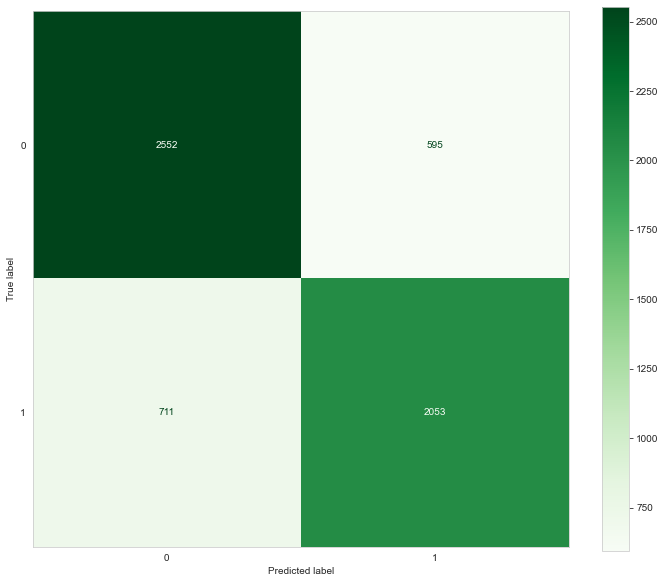

In [110]:
# plotting confusion matrix for the baseline model
fig,ax = plt.subplots(figsize=(12,10))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(baseline_new,X_test_one_hot,y_test,cmap="Greens",ax=ax);

#### 5.1.1. Feature Selection
RFECV class is used to remove unnecessary features based on how they affect model performance. It reduces model complexity. 

In [113]:
# instantiating the class
rfe = RFECV(LogisticRegression(solver = "sag",random_state = random_seed),cv = 15)

# fitting and transforming train data 
X_train_rfe = rfe.fit_transform(X_train_one_hot,y_train)

# transforming test data
X_test_rfe = rfe.transform(X_test_one_hot)

In [114]:
# previewing new shape
print("Previous number of features: ",X_train_one_hot.shape[1])
print("New number of features: " ,X_train_rfe.shape[1])

Previous number of features:  121
New number of features:  84


In [120]:
new_log =  LogisticRegression(solver="sag",random_state=random_seed)

print("Logistic Regression Model with All Features:")
evaluation(baseline_new,X_train_one_hot,y_train,X_test_one_hot,y_test)

print("\nLogistic Regression Model with less features:")
evaluation(new_log,X_train_rfe,y_train,X_test_rfe,y_test)


Logistic Regression Model with All Features:
Train Accuracy: 0.7921799073341621
Validation Accuracy: 0.789468105995661
Test Accuracy: 0.7790559972931822

Logistic Regression Model with less features:
Train Accuracy: 0.7928014464911289
Validation Accuracy: 0.7883377633887451
Test Accuracy: 0.7804094061918457


The model improves from an accuracy of 77.90% to 78.04% with less features

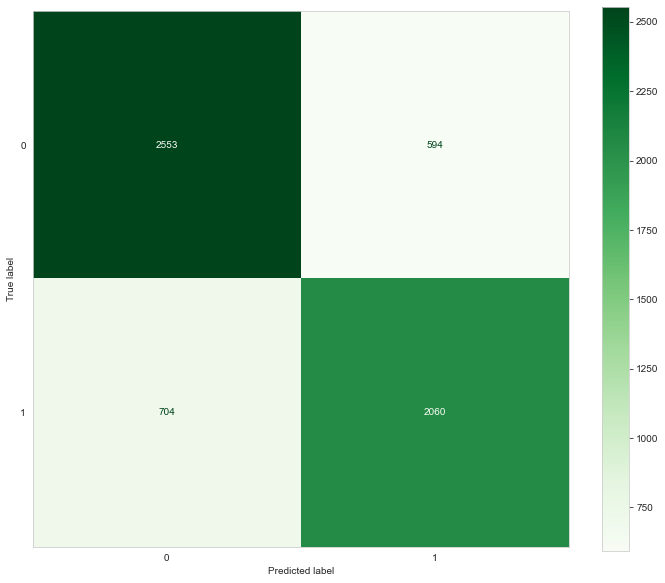

In [129]:
# plotting confusion matrix
fig,ax = plt.subplots(figsize = (12,10))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(new_log,X_test_rfe,y_test,ax=ax,cmap="Greens")

There is a reduction in False Negatives and an increase in True Positives which is good.

#### 5.2. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=random_seed,max_leaf_nodes=150,min_samples_split=7)
rf.fit(X_train_rfe,y_train)

rf_train = rf.predict(X_train_rfe)
rf_test = rf.predict(X_test_rfe)

print(accuracy_score(y_test,rf_test))
print(accuracy_score(y_train,rf_train))

0.7731348333615293
0.7946660639620297


##### 5.2.1 Tuning Decision Tree Hyperparameters
Tuning some of the hyperparameters could lead to an improvement in the model performance. GridSearchCV is used to find the best combination of hyperparameters. For the baseline model, the following hyperparameters are explored for the following reasons:

* solver - different solvers could lead to some useful differences in convergence. Some solvers may to be best suited for large datasets while others may be better for binary classification problems as depicted in the [documentation.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score:~:text=For%20small%20datasets%2C%20%E2%80%98liblinear%E2%80%99%20is%20a%20good%20choice%2C%20whereas%20%E2%80%98sag%E2%80%99%20and%20%E2%80%98saga%E2%80%99%20are%20faster%20for%20large%20ones)Exploring them could lead to improvements in accuracy.
* C - controls strength of regularization, smaller values mean stronger regularization which could reduce the probability of overfitting and reduce the complexity of our model as it has a lot of features.

In [177]:
knn = KNeighborsClassifier(n_neighbors=10,p = 1)
knn.fit(X_train_rfe,y_train)

knn_train = knn.predict(X_train_rfe)
knn_test = knn.predict(X_test_rfe)

print(accuracy_score(y_test,knn_test))
print(accuracy_score(y_train,knn_train))

0.7430214853662663
0.786360040682563


In [195]:
ridge = RidgeClassifierCV(cv=10,class_weight="balanced")
ridge.fit(X_train_rfe,y_train)

RidgeClassifierCV(class_weight='balanced', cv=10)

In [196]:
ridge.score(X_test_rfe,y_test)

0.7785484689561833

In [204]:
roc_auc_score(y_test,ridge.decision_function(X_test_rfe))

0.8578510901200556

In [205]:
# instantiating the XGBClassifier
xgb = XGBClassifier()

# fitting XGBClassifier
xgb.fit(X_train_rfe,y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train_rfe)
test_preds = xgb.predict(X_test_rfe)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 86.15%
Validation accuracy: 77.31%


In [206]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [209]:
grid_clf = GridSearchCV(xgb,param_grid,scoring="accuracy",cv=None,n_jobs=1)
grid_clf.fit(X_train_rfe,y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_rfe)
test_preds = grid_clf.predict(X_test_rfe)
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Training Accuracy: 81.85%
Validation accuracy: 81.85%


array([0.14699823, 0.93111235, 0.8539711 , ..., 0.5311617 , 0.54959184,
       0.8606273 ], dtype=float32)

In [214]:
roc_auc_score(y_test,grid_clf.predict_proba(X_test_rfe)[:,1])

0.8584561503225685

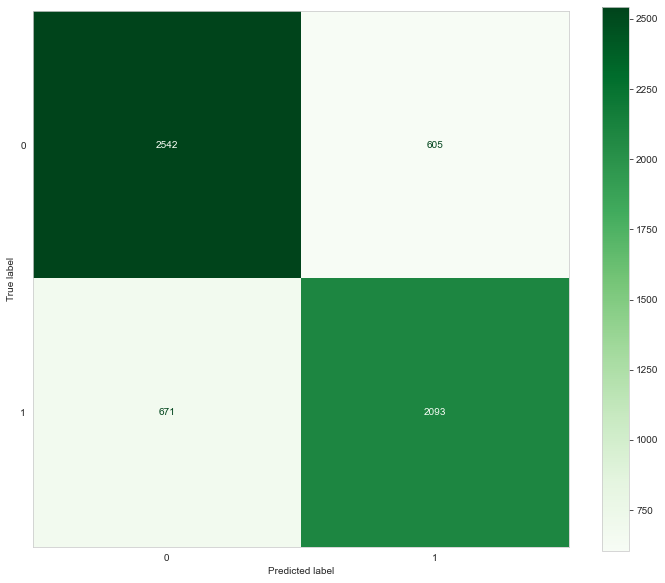

In [240]:
# plotting confusion matrix
fig,ax = plt.subplots(figsize = (12,10))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(ba,X_test_rfe,y_test,ax=ax,cmap="Greens")

In [ ]:
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.5


In [277]:
ba = XGBClassifier(learning_rate=0.1,min_child_weight=3,subsample = 0.5)
ba.fit(X_train_rfe,y_train)
ba.score(X_test_rfe,y_test)

0.7841312806631704

In [239]:
accuracy_score(y_train,ba.predict(X_train_rfe))

0.8170414736128376

In [248]:
roc_auc_score(y_test,ba.predict_proba(X_test_rfe)[:,1])

0.858419304076149

Predicting H1N1

In [257]:
new_y = data.h1n1_vaccine

X_h1n1_train,X_h1n1_test,y_h1n1_train,y_h1n1_test = train_test_split(X,new_y,stratify = new_y,random_state=random_seed)

In [259]:
# creating dataframe of correlated pairs and sorting in descending order
df_corr1 = X_h1n1_train.corr().abs().stack().reset_index().sort_values(0,ascending = False)
df_corr1["pairs"] = list(zip(df_corr1.level_0,df_corr1.level_1))
df_corr1.set_index(["pairs"],inplace = True)
df_corr1.drop(columns = ["level_1","level_0"],inplace=True)
df_corr1.columns = ["cc"]
df_corr1.drop_duplicates(inplace = True)
df_corr1[:10] 

,cc
pairs,
"(h1n1_concern, h1n1_concern)",1.000000
"(doctor_recc_h1n1, doctor_recc_seasonal)",0.590972
"(behavioral_outside_home, behavioral_large_gatherings)",0.580655
"(opinion_seas_risk, opinion_h1n1_risk)",0.565579
"(opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc)",0.492084
"(opinion_seas_vacc_effective, opinion_h1n1_vacc_effective)",0.475224
"(h1n1_concern, opinion_h1n1_risk)",0.372693
"(behavioral_touch_face, behavioral_wash_hands)",0.365353
"(h1n1_concern, opinion_h1n1_sick_from_vacc)",0.355411


In [260]:
imputer_fill1 = SimpleImputer(strategy = "most_frequent",missing_values = np.nan)
cols_to_fill = ["income_poverty","doctor_recc_h1n1","doctor_recc_seasonal","education","health_insurance","health_worker"]

# fitting and transforming on the train data then reassigning 
X_h1n1_train[cols_to_fill] = imputer_fill1.fit_transform(X_h1n1_train[cols_to_fill])

# transforming test data
X_h1n1_test[cols_to_fill] = imputer_fill1.transform(X_h1n1_test[cols_to_fill])

In [261]:
# instantiating a SimpleImputer to fill missing data with the string "missing"
imputer_miss1 = SimpleImputer(strategy="constant",missing_values=np.nan,fill_value="missing")
cols_miss = ["employment_status","employment_occupation","employment_industry"]

# fitting and transforming on the train data then reassigning
X_h1n1_train[cols_miss] = imputer_miss1.fit_transform(X_h1n1_train[cols_miss])

# transforming test data
X_h1n1_test[cols_miss] = imputer_miss1.transform(X_h1n1_test[cols_miss])

In [262]:
# dropping rows with null values
X_h1n1_train.dropna(inplace=True)
X_h1n1_test.dropna(inplace=True)

In [263]:
# identifying indices to drop
set11 = set(y_h1n1_test.index) 
set21= set(X_h1n1_test.index)
set31 = set(y_h1n1_train.index)
set41 = set(X_h1n1_train.index)

index_to_drop_test1 = list(set11 - set21)
index_to_drop_train1 = list(set31-set41)

In [264]:
#dropping those rows
y_h1n1_test = y_h1n1_test.drop(index_to_drop_test1)
y_h1n1_train = y_h1n1_train.drop(index_to_drop_train1)

In [267]:
# columns to replace
to_replace = ['employment_industry','employment_occupation','hhs_geo_region']

# instantiating the class
ord_en1 = OrdinalEncoder()

# fitting and transforming on training data and transforming on test data
X_h1n1_train[to_replace] = ord_en1.fit_transform(X_h1n1_train[to_replace])
X_h1n1_test[to_replace] = ord_en1.transform(X_h1n1_test[to_replace])

In [268]:
# assigning columns with float datatype to a variable
float_cols1 = X_h1n1_train.select_dtypes(["float","int"]).columns

# for loop to convert datatype to category
for col in float_cols1:
    X_h1n1_train[col] = X_h1n1_train[col].astype("category")
    X_h1n1_test[col] = X_h1n1_test[col].astype("category")

print(X_h1n1_train.dtypes.value_counts(),"\n")
print(X_h1n1_test.dtypes.value_counts()  ) 

category    13
object       9
category     6
category     3
category     1
category     1
category     1
category     1
dtype: int64 

category    13
object       9
category     6
category     3
category     1
category     1
category     1
category     1
dtype: int64


In [278]:
# one hot encoding the columns
X_train_one_hot_h = pd.get_dummies(X_h1n1_train,drop_first=True)
X_test_one_hot_h = pd.get_dummies(X_h1n1_test,drop_first=True)

In [279]:
from imblearn.over_sampling import SMOTE

In [406]:
sm = SMOTE(random_state=random_seed,sampling_strategy = 0.7)

X_resamp,y_resamp = sm.fit_resample(X_train_one_hot_h,y_h1n1_train)

In [283]:
y_resamp.value_counts()

1    13910
0    13910
Name: h1n1_vaccine, dtype: int64

In [383]:
X_resamp.shape

(27820, 121)

In [284]:
y_test.shape

(5911,)

In [294]:
mod = LogisticRegression(random_state=random_seed,solver="saga",max_iter=10000)
mod.fit(X_resamp,y_resamp)
mod.score(X_test_one_hot_h,y_h1n1_test)

0.8302526708495845

In [293]:
data.h1n1_vaccine.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [394]:
X_train_one_hot_h

,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_face_mask_1.0,behavioral_wash_hands_1.0,behavioral_large_gatherings_1.0,behavioral_outside_home_1.0,behavioral_touch_face_1.0,doctor_recc_h1n1_1.0,doctor_recc_seasonal_1.0,chronic_med_condition_1.0,child_under_6_months_1.0,health_worker_1.0,health_insurance_1.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0,opinion_h1n1_sick_from_vacc_2.0,opinion_h1n1_sick_from_vacc_3.0,opinion_h1n1_sick_from_vacc_4.0,opinion_h1n1_sick_from_vacc_5.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_seas_risk_2.0,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_missing,hhs_geo_region_1.0,hhs_geo_region_2.0,hhs_geo_region_3.0,hhs_geo_region_4.0,hhs_geo_region_5.0,hhs_geo_region_6.0,hhs_geo_region_7.0,hhs_geo_region_8.0,hhs_geo_region_9.0,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0,employment_industry_1.0,employment_industry_2.0,employment_industry_3.0,employment_industry_4.0,employment_industry_5.0,employment_industry_6.0,employment_industry_7.0,employment_industry_8.0,employment_industry_9.0,employment_industry_10.0,employment_industry_11.0,employment_industry_12.0,employment_industry_13.0,employment_industry_14.0,employment_industry_15.0,employment_industry_16.0,employment_industry_17.0,employment_industry_18.0,employment_industry_19.0,employment_industry_20.0,employment_industry_21.0,employment_occupation_1.0,employment_occupation_2.0,employment_occupation_3.0,employment_occupation_4.0,employment_occupation_5.0,employment_occupation_6.0,employment_occupation_7.0,employment_occupation_8.0,employment_occupation_9.0,employment_occupation_10.0,employment_occupation_11.0,employment_occupation_12.0,employment_occupation_13.0,employment_occupation_14.0,employment_occupation_15.0,employment_occupation_16.0,employment_occupation_17.0,employment_occupation_18.0,employment_occupation_19.0,employment_occupation_20.0,employment_occupation_21.0,employment_occupation_22.0,employment_occupation_23.0
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25449,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7118,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8044,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,

In [407]:
X_resamp.describe()

,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_face_mask_1.0,behavioral_wash_hands_1.0,behavioral_large_gatherings_1.0,behavioral_outside_home_1.0,behavioral_touch_face_1.0,doctor_recc_h1n1_1.0,doctor_recc_seasonal_1.0,chronic_med_condition_1.0,child_under_6_months_1.0,health_worker_1.0,health_insurance_1.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0,opinion_h1n1_sick_from_vacc_2.0,opinion_h1n1_sick_from_vacc_3.0,opinion_h1n1_sick_from_vacc_4.0,opinion_h1n1_sick_from_vacc_5.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_seas_risk_2.0,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_missing,hhs_geo_region_1.0,hhs_geo_region_2.0,hhs_geo_region_3.0,hhs_geo_region_4.0,hhs_geo_region_5.0,hhs_geo_region_6.0,hhs_geo_region_7.0,hhs_geo_region_8.0,hhs_geo_region_9.0,"census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0,employment_industry_1.0,employment_industry_2.0,employment_industry_3.0,employment_industry_4.0,employment_industry_5.0,employment_industry_6.0,employment_industry_7.0,employment_industry_8.0,employment_industry_9.0,employment_industry_10.0,employment_industry_11.0,employment_industry_12.0,employment_industry_13.0,employment_industry_14.0,employment_industry_15.0,employment_industry_16.0,employment_industry_17.0,employment_industry_18.0,employment_industry_19.0,employment_industry_20.0,employment_industry_21.0,employment_occupation_1.0,employment_occupation_2.0,employment_occupation_3.0,employment_occupation_4.0,employment_occupation_5.0,employment_occupation_6.0,employment_occupation_7.0,employment_occupation_8.0,employment_occupation_9.0,employment_occupation_10.0,employment_occupation_11.0,employment_occupation_12.0,employment_occupation_13.0,employment_occupation_14.0,employment_occupation_15.0,employment_occupation_16.0,employment_occupation_17.0,employment_occupation_18.0,employment_occupation_19.0,employment_occupation_20.0,employment_occupation_21.0,employment_occupation_22.0,employment_occupation_23.0
count,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647.000000,23647

In [402]:
rfeh = RFECV(LogisticRegression(random_state=random_seed,fit_intercept=False,solver="sag"),cv=15)
X_rfe_trainh = rfe.fit_transform(X_resamp,y_resamp)
X_rfe_testh = rfe.transform(X_test_one_hot_h)

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



KeyboardInterrupt: 

In [299]:
rfeh_log = LogisticRegression(max_iter=10000,random_state=random_seed)
rfeh_log.fit(X_rfe_trainh,y_h1n1_train)

pred_rfeh = rfeh_log.predict(X_rfe_testh)
accuracy_score(y_h1n1_test,pred_rfeh)

0.8358487366457521

In [410]:

rfh = RandomForestClassifier(random_state=random_seed,max_leaf_nodes=750,max_depth=20,criterion="entropy")
rfh.fit(X_resamp,y_resamp)

rf_trainh = rfh.predict(X_resamp)
rf_testh = rfh.predict(X_test_one_hot_h)

print(accuracy_score(y_h1n1_test,rf_testh))
print(accuracy_score(y_resamp,rf_trainh))

0.8327963371205698
0.8889499725123694


In [409]:
rid = RidgeClassifierCV(cv=5)
rid.fit(X_resamp,y_resamp)
rid.score(X_test_one_hot_h,y_h1n1_test)

0.7848058334746482

In [412]:
print(classification_report(y_h1n1_test,rid.predict(X_test_one_hot_h)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4628
           1       0.00      0.00      0.00      1269

    accuracy                           0.78      5897
   macro avg       0.39      0.50      0.44      5897
weighted avg       0.62      0.78      0.69      5897



/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anisiamuriuki/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



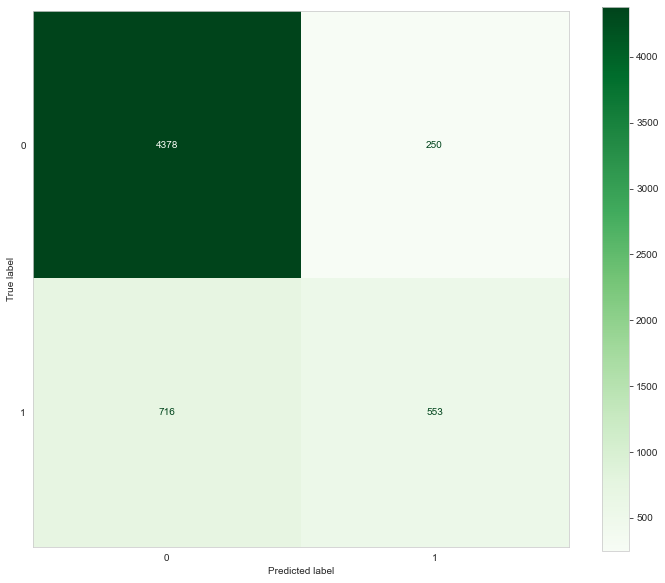

In [338]:
# plotting confusion matrix
fig,ax = plt.subplots(figsize = (12,10))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(rid,X_rfe_testh,y_h1n1_test,ax=ax,cmap="Greens")

In [355]:
roc_auc_score(y_h1n1_test,rfeh_log.decision_function(X_rfe_testh))

0.838796618111703

In [374]:
# Instantiate XGBClassifier
clf = XGBClassifier(learning_rate=0.1,min_child_weight=3,subsample = 0.5)

# Fit XGBClassifier
clf.fit(X_resamp,y_h1n1_train)

# Predict on training and test sets
training_preds = clf.predict(X_rfe_trainh)
test_preds = clf.predict(X_rfe_testh)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_h1n1_train,training_preds)
test_accuracy = accuracy_score(y_h1n1_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 85.79%
Validation accuracy: 83.55%


In [372]:
roc_auc_score(y_h1n1_test,clf.predict_proba(X_rfe_testh)[:,1])

0.8332739932967044